In [2]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.options.display.float_format = '{:.6f}'.format

### Study with Sparsity

In [5]:
with open('./total_result.pickle', mode='rb') as f:
    tot_results = pickle.load(f)
with open('./study.pickle', mode='rb') as f:
    study = pickle.load(f)

In [10]:
result_df = pd.DataFrame(tot_results)
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df

,sparseSVDfm,originalfm,NMFdeepfm,originaldeepfm,sparseNMFdeepfm,SVDdeepfm,NMFfm,sparseSVDdeepfm,SVDfm
precision,0.135138,0.449312,0.503823,0.450131,0.505152,0.509412,0.247248,0.477793,0.170336
recall,0.021630,0.080532,0.089874,0.082042,0.091329,0.092294,0.032675,0.088053,0.024798
hit_rate,0.448624,0.862959,0.897936,0.866972,0.905081,0.907917,0.596330,0.894293,0.512997
reciprocal_rank,0.238869,0.678240,0.709410,0.660387,0.709221,0.718435,0.451873,0.686842,0.309697
dcg,0.399354,1.393211,1.538361,1.377135,1.541335,1.555751,0.806211,1.456589,0.526900
threshold,0.047067,NaN,NaN,NaN,0.030610,NaN,NaN,0.037065,NaN


In [11]:
mean_result_df[['originalfm', 'originaldeepfm', 'SVDfm', 'sparseSVDfm', 'SVDdeepfm', 'sparseSVDdeepfm', 'NMFfm', 'NMFdeepfm', 'sparseNMFdeepfm',]]

,originalfm,originaldeepfm,SVDfm,sparseSVDfm,SVDdeepfm,sparseSVDdeepfm,NMFfm,NMFdeepfm,sparseNMFdeepfm
precision,0.449312,0.450131,0.170336,0.135138,0.509412,0.477793,0.247248,0.503823,0.505152
recall,0.080532,0.082042,0.024798,0.021630,0.092294,0.088053,0.032675,0.089874,0.091329
hit_rate,0.862959,0.866972,0.512997,0.448624,0.907917,0.894293,0.596330,0.897936,0.905081
reciprocal_rank,0.678240,0.660387,0.309697,0.238869,0.718435,0.686842,0.451873,0.709410,0.709221
dcg,1.393211,1.377135,0.526900,0.399354,1.555751,1.456589,0.806211,1.538361,1.541335
threshold,NaN,NaN,NaN,0.047067,NaN,0.037065,NaN,NaN,0.030610


1. `sparseSVDfm` $<$ `SVDfm` $<$ `NMFfm` $<$ `originalfm` $<$ `originaldeepfm` $<$ `sparseSVDdeepfm` $<$ `NMFdeepfm` $<$ `sparseNMFdeepfm` $<$ `SVDdeepfm` 순의 성능  
(`precision` 기준)
2. [SVD] $<$ [NMF] $<$ [original &\ deepfm] $<$ [SVD & NMF w\ deepfm]

### Checking Effects of `num_eigenvector` & `emb_dim`

In [76]:
with open('./total_result_4.pickle', mode='rb') as f:
    tot_results = pickle.load(f)
result_df = pd.DataFrame(tot_results)

In [ ]:
sorted_num = sorted([int(col[:-5]) for col in result_df.columns])
sorted_col = [str(num) + 'SVDfm' for num in sorted_num]

In [72]:
result_df = pd.concat([result_df.iloc[:, :7], result_df.iloc[:, 9:]], axis=1)
result_df

,1SVDfm,4SVDfm,5SVDfm,6SVDfm,7SVDfm,8SVDfm,8SVDfm,11SVDfm,12SVDfm,14SVDfm,...,110SVDfm,111SVDfm,112SVDfm,113SVDfm,114SVDfm,116SVDfm,117SVDfm,118SVDfm,127SVDfm,128SVDfm
precision,"[0.06926605504587156, 0.14770642201834863, 0.0...","[0.05825688073394495, 0.14036697247706423, 0.1...","[0.08990825688073395, 0.11422018348623852, 0.1...","[0.08486238532110092, 0.014678899082568808, 0....","[0.09311926605504588, 0.06834862385321101, 0.1...","[0.16834862385321103, 0.05229357798165138, 0.0...","[0.20412844036697247, 0.12935779816513762, 0.1...","[0.1908256880733945, 0.07568807339449542, 0.20...","[0.17155963302752292, 0.12844036697247707, 0.1...","[0.17385321100917434, 0.1743119266055046, 0.13...",...,"[0.1614678899082569, 0.07706422018348624, 0.17...","[0.19862385321100917, 0.11100917431192661, 0.0...","[0.19954128440366972, 0.11192660550458715, 0.1...","[0.17018348623853216, 0.18807339449541285, 0.1...","[0.20275229357798166, 0.10275229357798164, 0.1...","[0.2018348623853211, 0.1532110091743119, 0.097...","[0.2004587155963303, 0.05229357798165137, 0.15...","[0.2, 0.1642201834862385, 0.18073394495412842,...","[0.15825688073394495, 0.07477064220183485, 0.1...","[0.15091743119266057, 0.13073394495412843, 0.2..."
recall,"[0.015405547555220262, 0.0191101569269429, 0.0...","[0.008375125842005858, 0.016398610193673734, 0...","[0.011741858864165755, 0.01725312628541994, 0....","[0.008178665904200489, 0.0021007041610662516, ...","[0.007575961089095756, 0.006133487772555162, 0...","[0.02100556321455503, 0.004886342290729274, 0....","[0.027413007267691112, 0.01596565007551653, 0....","[0.028191326380521447, 0.01242074992722693, 0....","[0.02389757151297829, 0.019196143952164898, 0....","[0.025580154733452473, 0.025396109856001544, 0...",...,"[0.02423867603771246, 0.013634774301354171, 0....","[0.028116206149298426, 0.016738719673455825, 0...","[0.02758023465518942, 0.021972593645699652, 0....","[0.027344575706441956, 0.026305887474379994, 0...","[0.027424524764651525, 0.017793744685554544, 0...","[0.028789112822340028, 0.023644617256227206, 0...","[0.026823962050243965, 0.008885585019637982, 0...","[0.026365577288642715, 0.024141434003974217, 0...","[0.023429859474261572, 0.016278358696086365, 0...","[0.02232162172283063, 0.02187326187355212, 0.0..."
hit_rate,"[0.28440366972477066, 0.4793577981651376, 0.31...","[0.22018348623853212, 0.44724770642201833, 0.5...","[0.32798165137614677, 0.40825688073394495, 0.3...","[0.286697247706422, 0.06651376146788991, 0.130...","[0.286697247706422, 0.23623853211009174, 0.415...","[0.4908256880733945, 0.20642201834862386, 0.26...","[0.5619266055045872, 0.4151376146788991, 0.405...","[0.573394495412844, 0.30963302752293576, 0.584...","[0.5252293577981652, 0.46788990825688076, 0.36...","[0.5344036697247706, 0.5298165137614679, 0.493...",...,"[0.5275229357798165, 0.30963302752293576, 0.53...","[0.5756880733944955, 0.41743119266055045, 0.36...","[0.5619266055045872, 0.39908256880733944, 0.41...","[0.5481651376146789, 0.5481651376146789, 0.435...","[0.573394495412844, 0.36009174311926606, 0.552...","[0.5756880733944955, 0.5045871559633027, 0.362...","[0.5458715596330275, 0.22247706422018348, 0.50...","[0.5504587155963303, 0.5068807339449541, 0.566...","[0.5252293577981652, 0.29357798165137616, 0.45...","[0.5114678899082569, 0.463302752293578, 0.5756..."
reciprocal_rank,"[0.1418960244648318, 0.26219418960244645, 0.15...","[0.09365443425076452, 0.19105504587155966, 0.2...","[0.11831039755351681, 0.2342125382262997, 0.19...","[0.1551605504587156, 0.02779051987767584, 0.05...","[0.18000764525993884, 0.1073394495412844, 0.21...","[0.2656345565749235, 0.09430428134556575, 0.11...","[0.4102446483180428, 0.24315749235474005, 0.20...","[0.3407874617737003, 0.12817278287461772, 0.36...","[0.34816513761467893, 0.23035168195718655, 0.1...","[0.34009938837920495, 0.32614678899082566, 0.2...",...,"[0.3263379204892967, 0.11242354740061161, 0.31...","[0.40451070336391437, 0.203019877675841, 0.203...","[0.38769113149847095, 0.16918

In [92]:
# result_df = result_df[sorted_col]
# result_df
mean_result_df = result_df.map(lambda x: np.mean(x))
mean_result_df

,1SVDfm,4SVDfm,5SVDfm,6SVDfm,7SVDfm,8SVDfm,8SVDfm,11SVDfm,12SVDfm,14SVDfm,...,110SVDfm,111SVDfm,112SVDfm,113SVDfm,114SVDfm,116SVDfm,117SVDfm,118SVDfm,127SVDfm,128SVDfm
precision,0.084495,0.102110,0.080826,0.055138,0.094679,0.080183,0.150550,0.167156,0.146422,0.156239,...,0.156697,0.127431,0.142936,0.150917,0.163303,0.138624,0.147982,0.183119,0.132752,0.133211
recall,0.012421,0.013021,0.009636,0.006303,0.009769,0.008433,0.020680,0.024055,0.021344,0.024757,...,0.022488,0.020528,0.022976,0.024082,0.024815,0.021840,0.022091,0.026587,0.022374,0.021161
hit_rate,0.307798,0.334862,0.282110,0.206881,0.308716,0.270183,0.467890,0.511468,0.471560,0.497248,...,0.483028,0.442661,0.467890,0.496330,0.510092,0.439908,0.466514,0.548165,0.440826,0.451835
reciprocal_rank,0.158662,0.164625,0.132653,0.101942,0.189962,0.134671,0.276124,0.294121,0.256843,0.302760,...,0.296193,0.243570,0.244106,0.297714,0.285466,0.272439,0.276835,0.337431,0.248998,0.242492
dcg,0.245049,0.286713,0.224470,0.160335,0.298800,0.228607,0.461079,0.504094,0.433531,0.487254,...,0.487328,0.385300,0.415374,0.470867,0.486191,0.438733,0.454160,0.570121,0.403289,0.394637
exp_var,0.121849,0.210858,0.228027,0.242791,0.254291,0.265095,0.265095,0.288451,0.295169,0.307345,...,0.631764,0.634009,0.636288,0.638610,0.640794,0.645194,0.647384,0.649886,0.668782,0.670585
const_err,7.306536,6.926348,6.850587,6.784765,6.733046,6.684092,6.684092,6.577019,6.545898,6.489113,...,4.731401,4.716956,4.702252,4.687214,4.673033,4.644323,4.629965,4.613512,4.487290,4.475054


In [10]:
performance_metrics = ['precision', 'recall', 'hit_rate', 'reciprocal_rank', 'dcg']
svd_metrics = ['exp_var', 'const_err']

In [224]:
normalized_df = (mean_result_df - mean_result_df.min(axis=1).values.reshape(-1, 1)) / (mean_result_df.max(axis=1) - mean_result_df.min(axis=1)).values.reshape(-1, 1)

<Axes: >

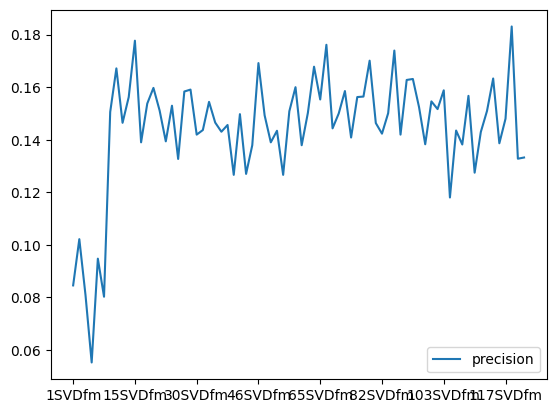

In [94]:
mean_result_df.T.plot(y='precision')

### DeepFM 확인

In [3]:
with open('./deepfm_result.pickle', mode='rb') as f:
    deep_results = pickle.load(f)
deep_df = pd.DataFrame(deep_results)

In [4]:
sorted_num = sorted([int(col[:-9]) for col in deep_df.columns])
sorted_col = [str(num) + 'SVDdeepfm' for num in sorted_num]

In [5]:
mean_deep_df = deep_df[sorted_col].map(lambda x: np.mean(x))
mean_deep_df

,1SVDdeepfm,2SVDdeepfm,3SVDdeepfm,4SVDdeepfm,5SVDdeepfm,6SVDdeepfm,7SVDdeepfm,8SVDdeepfm,9SVDdeepfm,10SVDdeepfm,...,58SVDdeepfm,61SVDdeepfm,67SVDdeepfm,71SVDdeepfm,75SVDdeepfm,76SVDdeepfm,88SVDdeepfm,89SVDdeepfm,94SVDdeepfm,96SVDdeepfm
precision,0.356606,0.421009,0.482018,0.500734,0.495780,0.514220,0.521560,0.516422,0.517890,0.526881,...,0.417798,0.411743,0.409633,0.396972,0.396239,0.417798,0.404771,0.356881,0.372661,0.366789
recall,0.052055,0.073002,0.086182,0.091179,0.087929,0.093599,0.093703,0.092445,0.093176,0.095680,...,0.073625,0.072589,0.071613,0.069649,0.065945,0.073531,0.070756,0.061398,0.062469,0.061570
hit_rate,0.754587,0.824771,0.876606,0.894495,0.891743,0.909174,0.910092,0.911009,0.912385,0.915138,...,0.855046,0.855046,0.843578,0.841284,0.838532,0.859633,0.838532,0.802752,0.804587,0.813303
reciprocal_rank,0.567401,0.633035,0.672446,0.689969,0.696743,0.713746,0.725168,0.718830,0.717179,0.717959,...,0.628081,0.623945,0.607515,0.596743,0.607087,0.634939,0.607538,0.573135,0.586131,0.576239
dcg,1.114476,1.298793,1.463837,1.516351,1.512351,1.563027,1.591615,1.572135,1.573260,1.595761,...,1.273821,1.258584,1.241120,1.202859,1.209179,1.277811,1.231077,1.099817,1.146710,1.123787
exp_var,0.121849,0.159755,0.192403,0.210858,0.228027,0.242791,0.254291,0.265095,0.274052,0.281248,...,0.489058,0.498433,0.517441,0.529830,0.541408,0.544223,0.577559,0.579931,0.593324,0.598204
const_err,7.306536,7.147100,7.006873,6.926348,6.850587,6.784765,6.733046,6.684092,6.643235,6.610228,...,5.573305,5.521936,5.416294,5.346315,5.280074,5.263844,5.067691,5.053443,4.972228,4.942309


In [17]:
normalized_df = (mean_deep_df - mean_deep_df.min(axis=1).values.reshape(-1, 1)) / (mean_deep_df.max(axis=1) - mean_deep_df.min(axis=1)).values.reshape(-1, 1)

In [21]:
# mean_deep_df_T = mean_deep_df.T
mean_deep_df_T = normalized_df.T
mean_deep_df_T.index = mean_deep_df_T.index.map(lambda x: int(x[:-9]))

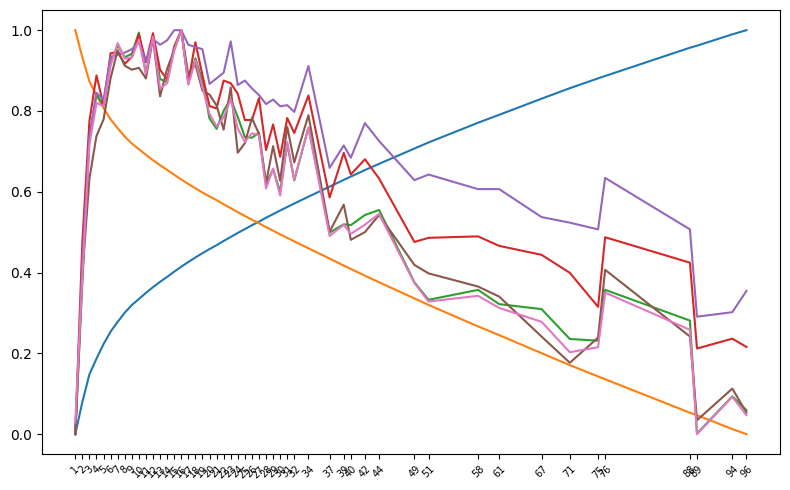

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(mean_deep_df_T.index, mean_deep_df_T[svd_metrics + performance_metrics])
plt.xticks(mean_deep_df_T.index, fontsize=7, rotation=45)
plt.tight_layout()
plt.show()

`SVD + deepFM`의 metrics은 `num_embedding`이 1 - 6일 떄 빠르게 증가했다가 16에서 최대치가 되고 점차 감소함

`num_deep_layers` 확인

In [36]:
with open('./deepfm_result_2.pickle', mode='rb') as f:
    deep_results = pickle.load(f)
deep_df = pd.DataFrame(deep_results)

In [47]:
sorted_num = sorted([int(col[:-15]) for col in deep_df.columns])
sorted_col = [str(num) + 'layersSVDdeepfm' for num in sorted_num]

In [48]:
mean_deep_df = deep_df[sorted_col].map(lambda x: np.mean(x))
mean_deep_df

,1layersSVDdeepfm,2layersSVDdeepfm,3layersSVDdeepfm,4layersSVDdeepfm,5layersSVDdeepfm,6layersSVDdeepfm,7layersSVDdeepfm,8layersSVDdeepfm,9layersSVDdeepfm,10layersSVDdeepfm
precision,0.525138,0.527890,0.506697,0.518716,0.497431,0.471835,0.449358,0.349725,0.418532,0.431743
recall,0.093908,0.096109,0.092597,0.094322,0.088973,0.084946,0.078753,0.062497,0.073656,0.075449
hit_rate,0.909633,0.920183,0.914220,0.919266,0.901376,0.877064,0.872477,0.720183,0.842202,0.847706
reciprocal_rank,0.726636,0.733417,0.707630,0.720979,0.706292,0.670841,0.646407,0.527974,0.614213,0.618479
dcg,1.597752,1.607813,1.536727,1.578820,1.517490,1.434822,1.362010,1.072014,1.269698,1.304924
exp_var,0.319258,0.319258,0.319258,0.319258,0.319258,0.319258,0.319258,0.319258,0.319258,0.319258
const_err,6.433066,6.433066,6.433066,6.433066,6.433066,6.433066,6.433066,6.433066,6.433066,6.433066


In [54]:
normalized_df = (mean_deep_df - mean_deep_df.min(axis=1).values.reshape(-1, 1)) / (mean_deep_df.max(axis=1) - mean_deep_df.min(axis=1)).values.reshape(-1, 1)
mean_deep_df_T = normalized_df.T
mean_deep_df_T.index = mean_deep_df_T.index.map(lambda x: int(x[:-15]))

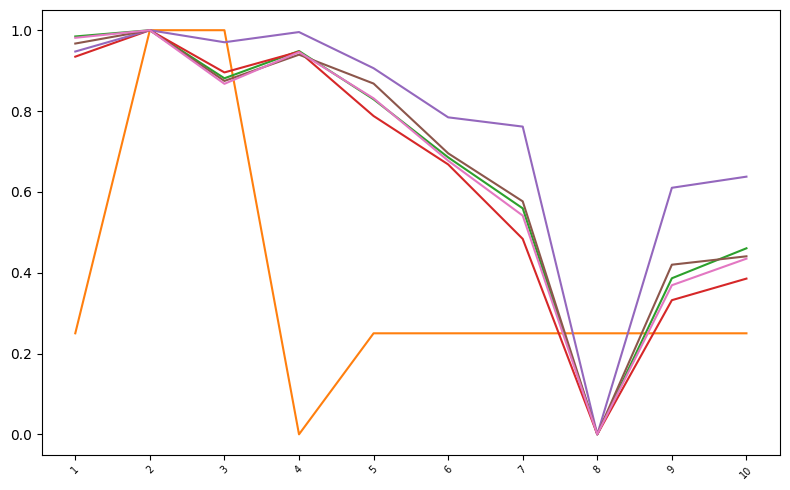

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(mean_deep_df_T.index, mean_deep_df_T[svd_metrics+performance_metrics])
plt.xticks(mean_deep_df_T.index, fontsize=7, rotation=45)
plt.tight_layout()
plt.show()

### 